<a href="https://colab.research.google.com/github/khalidpark/machinelearning_whitepaper/blob/main/Machine_learning_whitepaper_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

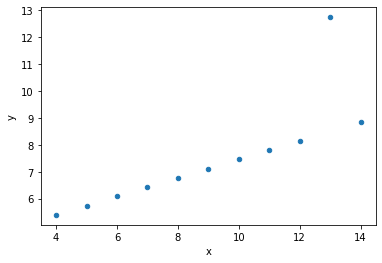

In [8]:
import seaborn as sns
ans = sns.load_dataset('anscombe').query('dataset=="III"')
ans.plot.scatter('x', 'y');


OLS

In [10]:
from  sklearn.linear_model import LinearRegression

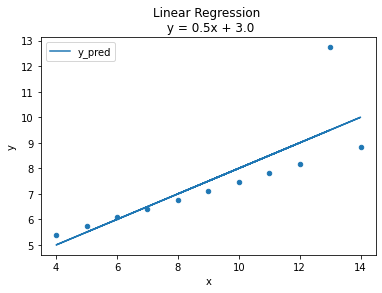

In [11]:
%matplotlib inline

ax = ans.plot.scatter('x', 'y')

# OLS 
ols = LinearRegression()
ols.fit(ans[['x']], ans['y'])

# 회귀계수와 intercept를 확인합니다.
m = ols.coef_[0].round(2)
b = ols.intercept_.round(2)
title = f'Linear Regression \n y = {m}x + {b}'

# 훈련 데이터로 예측을 합니다.
ans['y_pred'] = ols.predict(ans[['x']])

ans.plot('x', 'y_pred', ax=ax, title=title);


Ridge Regression

In [13]:
import numpy as np

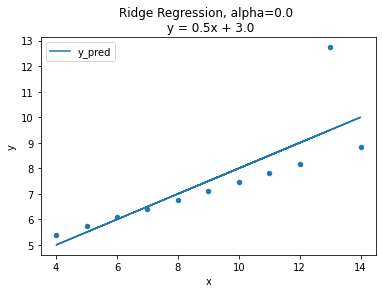

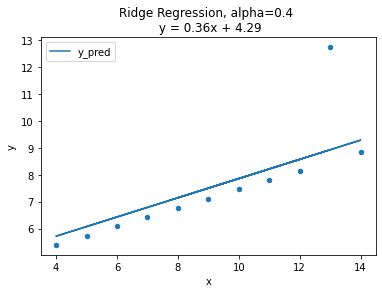

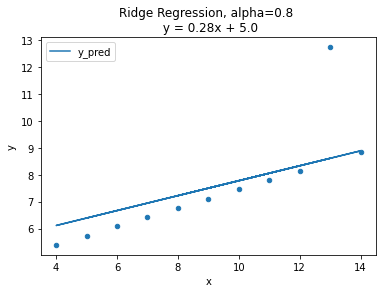

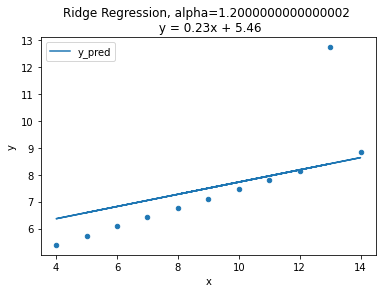

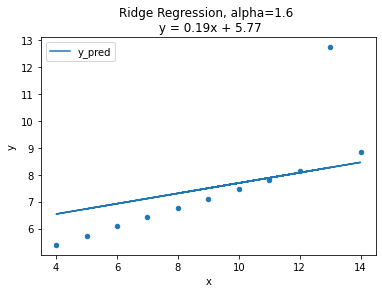

In [14]:
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge

def ridge_anscombe(alpha):
    """
    alpha : lambda, penalty term
    """
    ans = sns.load_dataset('anscombe').query('dataset=="III"')

    ax = ans.plot.scatter('x', 'y')

    ridge = Ridge(alpha=alpha, normalize=True)
    ridge.fit(ans[['x']], ans['y'])

    # 회귀계수와 intercept를 가져옵니다.
    m = ridge.coef_[0].round(2)
    b = ridge.intercept_.round(2)
    title = f'Ridge Regression, alpha={alpha} \n y = {m}x + {b}'

    # 예측
    ans['y_pred'] = ridge.predict(ans[['x']])

    ans.plot('x', 'y_pred', ax=ax, title=title)
    plt.show()
    
# 여러 알파값으로 반복해 그래프를 그립니다.
alphas = np.arange(0, 2, 0.4)
for alpha in alphas:
    ridge_anscombe(alpha=alpha)


RidgeCV를 통한 최적 패널티(alpha, lambda) 검증


In [17]:
from sklearn.linear_model import RidgeCV

alphas = [0.01, 0.05, 0.1, 0.2, 1.0, 10.0, 100.0]

ridge = RidgeCV(alphas=alphas, normalize=True, cv=3)
ridge.fit(ans[['x']], ans['y'])
print("alpha: ", ridge.alpha_)

alpha:  0.2


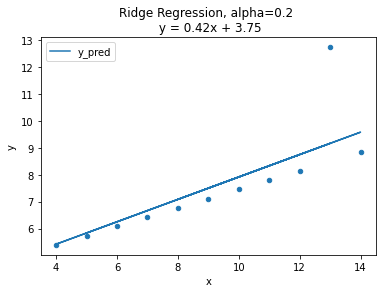

In [18]:
ax = ans.plot.scatter('x', 'y')

m = ridge.coef_[0].round(2)
b = ridge.intercept_.round(2)
title = f'Ridge Regression, alpha={ridge.alpha_} \n y = {m}x + {b}'

ans['y_pred'] = ridge.predict(ans[['x']])

ans.plot('x', 'y_pred', ax=ax, title=title)
plt.show()




---



최종

In [ ]:
def RidgeCVRegression(degree=3, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), 
                         RidgeCV(**kwargs))

# alphas = np.linspace(0.01, 0.5, num=20)
alphas = np.arange(0.01, 0.2, 0.01)

model = RidgeCVRegression(alphas=alphas, normalize=True, cv=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Test MAE: ${mae:,.0f}')
print(f'R2 Score: {r2:,.4f}\n')

coefs = model.named_steps["ridgecv"].coef_
print(f'Number of Features: {len(coefs)}')

print(f'alpha: {model.named_steps["ridgecv"].alpha_}')
print(f'cv best score: {model.named_steps["ridgecv"].best_score_}') # best score: R2
